# Trabajo práctico especial
  
Materia: Fundamentos de la Ciencia de Datos.    
Integrantes: León Nicolás, Ortiz Matías y Ramírez Gonzalo.    

## Datos sobre el dataset

Este conjunto de datos contiene 3232 muestras de vino obtenidas mediante pruebas fisicoquímicas en la bodega El Refugio, elaboradas a partir de dos tipos de uva.

### Descripción de las variables:

- **type**: tipo de uva con la que se elabora el vino.
- **fixed acidity**: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
- **volatile acidity**: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 
- **citric acid**: contenido de ácido cítrico en el vino, medido en gramos por litro.
- **residual sugar**: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro. 
- **chlorides**: concentración de cloruros (sales) en el vino, medida en gramos por litro.
- **free sulfur dioxide**: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 
- **total sulfur dioxide**: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
- **density**: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
- **pH**: medida de la acidez o alcalinidad del vino. 
- **sulphates**: concentración de sales de sulfato en el vino, medida en gramos por litro. 
- **alcohol**: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
- **quality**: puntuación del vino, con una escala que va de 0 a 10.


## Metodología del análisis

En esta notebook, vamos a realizar un análisis exploratorio de los datos, siguiendo el orden mostrado a continuación:  

**1 -** Preparación del archivo ".csv"  
**2 -** Estudio de los tipos de datos.  
**3 -** Estudio de valores nulos.  
**4 -** Transformación del dataset.  
**5 -** Estudio univariado.  
**6 -** Estudio bivariado.  
**7 -** Conclusiones.  

## Preparación del archivo ".csv"

Como para empezar, vemos el archivo _.csv_ no está separado por comas, sino por los punto y coma. Lo abrimos de la forma correspondiente:

In [1]:
import pandas as pd

raw_ds = pd.read_csv("winequality_BR.csv", sep = ';')

Al utilizar la función _head()_, vemos que en el archivo aparecen columnas vacías y sin nombre.

In [2]:
raw_ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Riesling,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,NaN,NaN,NaN
1,Riesling,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,NaN,NaN,NaN
2,Riesling,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,NaN,NaN,NaN
3,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,NaN,NaN,NaN
4,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,NaN,NaN,NaN


Al quitar las columnas con la función _dropna_, pudimos observar que la columna _"Unnamed: 15"_ sigue apareciendo. Esto indica que, la misma tiene al menos un valor no nulo.

In [3]:
raw_ds = raw_ds.dropna(axis=1, how='all')
raw_ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 15
0,Riesling,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,NaN
1,Riesling,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,NaN
2,Riesling,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,NaN
3,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,NaN
4,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,NaN


Utilizando la función de _value_counts()_ vemos cuál es el valor no nulo y cuántos de estos hay.

In [4]:
raw_ds["Unnamed: 15"].value_counts()

Unnamed: 15
Riesling    1
Name: count, dtype: int64

Dado que, el valor no nulo de la columna _Unnamed: 15_ es igual a uno de los valores de la columna _type_, comprobamos que, no haya datos faltantes en esta última porque quizá podría haber ocurrido un error que cause este "desplazamiento" del dato.

In [5]:
cant_nulos = raw_ds["type"].isna().sum()
print(f"La cantidad de valores nulos de type es: {cant_nulos}")

La cantidad de valores nulos de type es: 0


Sin embargo, que no haya valores nulos, no significa que no haya datos erróneos, por lo que miramos cuáles son los datos que contiene la columna type.

In [6]:
raw_ds["type"].value_counts()

type
Riesling    1633
Garnacha    1599
Name: count, dtype: int64

Como última confirmación, vemos cómo son el resto de atributos para tal observación.

In [7]:
observacion = raw_ds[raw_ds["Unnamed: 15"].str.lower() == 'riesling']
observacion

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 15
1626,Riesling,9.0,0.22,0.49,10.4,0.048,52.0,195.0,0.9987,3.31,0.44,10.2,6,Riesling


Habiendo comprobado que tampoco difiere la variable _type_ de la desconocida en este registro, procedemos borrando la columna que no aporta ningún tipo de información. 

In [8]:
raw_ds = raw_ds.drop(columns="Unnamed: 15", axis=1)
raw_ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Riesling,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,Riesling,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,Riesling,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Estudio de los tipos de datos y unidades 

Comenzamos clasificando por tipo de dato a cada una de las _features_ del dataset:

**- type:** dato cualitativo nominal.   
**- fixed_acidity:** dato cuantitativo continuo.  
**- volatile_acidity:** dato cuantitativo contiunuo.  
**- citric acid:** dato cuantitativo continuo.  
**- residual sugar:** dato cuantitativo continuo.  
**- chlorides:** dato cuantitativo continuo.  
**- free sulfur dioxide:** dato cuantitativo continuo.   
**- total sulfur dioxide:** dato cuantitativo continuo.    
**- density:** dato cuantitativo continuo.  
**- pH:** dato cuantitativo continuo.  
**- sulphates:** tipo de dato cuantiativo continuo.  
**- alcohol:** tipo de dato cuantitativo continuo.  
**- quality:** tipo de dato cualitativa ordinal.  

Utilizando la  función _info_, podemos comparar los tipos de los datos definidos anteriormente, con los de Python. De esta manera, corregimos las discrepancias.

In [9]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3232 non-null   object 
 1   fixed acidity         3232 non-null   float64
 2   volatile acidity      3232 non-null   float64
 3   citric acid           3232 non-null   float64
 4   residual sugar        3232 non-null   float64
 5   chlorides             3232 non-null   float64
 6   free sulfur dioxide   3232 non-null   float64
 7   total sulfur dioxide  3232 non-null   float64
 8   density               3232 non-null   float64
 9   pH                    3232 non-null   float64
 10  sulphates             3232 non-null   float64
 11  alcohol               3232 non-null   object 
 12  quality               3232 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.4+ KB


Como podemos observar, el feature "alcohol" lo definimos como un dato cuantitativo continuo, pero, en el dataset aparece como un _object_. Por lo tanto, lo castearemos como _float64_

In [10]:
#arrancamos haciendo una copia
preprocessed_ds = raw_ds.copy()

try:
    preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].astype(float)
    print("Fue en éxito")
except ValueError :
    print("No se pudo convertir el dato a float64")

No se pudo convertir el dato a float64


La ejecución del casting dió un error, esto quiere decir que hay datos en la columna de _alcohol_ que no concuerdan con el tipo de dato _float64_. Vemos con _value_counts_ qué valores hay en la columna:

In [11]:
# coerce, reemplaza los errores por NaN
df_con_errores = preprocessed_ds[preprocessed_ds["alcohol"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()] 
df_con_errores

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2992,Garnacha,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333,6
2995,Garnacha,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333,6
3072,Garnacha,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,110.666.666.666.667,6
3074,Garnacha,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,956.666.666.666.667,6
3108,Garnacha,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,135.666.666.666.667,7
3147,Garnacha,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,923.333.333.333.333,6


Estos valores que no podemos convertir a _float64_, no son siquiera números o valores extremos (los miles se separan con comas en inglés). Si miramos el resto de atributos no aparece nada raro. Dado que son pocos, podríamos borrarlos porque no sesgarían la muestra. Sin embargo, no sería raro intuir que un hubo un problema con la carga de los decimales periódicos, más que nada por el "redondeo" de los supuestos "seis períodicos" a siete.   
A su vez, para la corrección habría que tener en cuenta que, el grado de alcohol del vino ronda entre el 5% y el 20%, y esto hace que no haya ambigüedades a la hora de elegir donde comienzan los decimales. Además, los valores resultantes son cercanos a la mediana y media...

In [12]:
df_sin_errores = preprocessed_ds[preprocessed_ds["alcohol"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna() == False]
df_sin_errores["alcohol"].astype(float).describe()

count    3226.000000
mean       10.355998
std         1.099261
min         8.400000
25%         9.500000
50%        10.100000
75%        11.000000
max        14.900000
Name: alcohol, dtype: float64

Por lo tanto, procedemos reemplazando los valores:

In [13]:
# hacemos los reemplazos
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("100.333.333.333.333", "10.03")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("923.333.333.333.333", "9.23")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("110.666.666.666.667", "11.07")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("956.666.666.666.667", "9.57")
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].replace("135.666.666.666.667", "13.57")

# hacemos la conversion
preprocessed_ds["alcohol"] = preprocessed_ds["alcohol"].astype(float)

# repitiendo lo mismo de antes para cerciorarse
df_con_errores = preprocessed_ds[preprocessed_ds["alcohol"].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
df_con_errores

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Estudio de valores nulos

Primeramente, vamos a ver cuántos nulos hay por cada varaible del dataset.

In [14]:
print("La variable...")
for columna in preprocessed_ds.columns:
    cantidad_nulos = preprocessed_ds[columna].isnull().sum()
    print(f" -> '{columna}' tiene {cantidad_nulos} valores nulos.")

La variable...
 -> 'type' tiene 0 valores nulos.
 -> 'fixed acidity' tiene 0 valores nulos.
 -> 'volatile acidity' tiene 0 valores nulos.
 -> 'citric acid' tiene 0 valores nulos.
 -> 'residual sugar' tiene 0 valores nulos.
 -> 'chlorides' tiene 0 valores nulos.
 -> 'free sulfur dioxide' tiene 0 valores nulos.
 -> 'total sulfur dioxide' tiene 0 valores nulos.
 -> 'density' tiene 0 valores nulos.
 -> 'pH' tiene 0 valores nulos.
 -> 'sulphates' tiene 0 valores nulos.
 -> 'alcohol' tiene 0 valores nulos.
 -> 'quality' tiene 0 valores nulos.


Viendo que las _features_ no tienen nulos, intentaremos detectar aquellos valores que deberían ser reemplazados por nulos, como por ejemplo, los "discernibles". Antes que nada, generamos un reporte para complementar el análisis:

In [15]:
from ydata_profiling import ProfileReport

# report = ProfileReport(preprocessed_ds)
# report.to_notebook_iframe()

  
Ahora si, continuamos con el análisis:

In [16]:
preprocessed_ds["type"].value_counts()

type
Riesling    1633
Garnacha    1599
Name: count, dtype: int64

<font size="3"> - _No parece haber nada raro en esta feature_

In [17]:
preprocessed_ds["fixed acidity"].sort_values(ascending=True)

1678     4.6
1728     4.7
862      4.8
864      4.8
2454     4.9
        ... 
2187    15.5
2188    15.5
2190    15.6
2075    15.6
2285    15.9
Name: fixed acidity, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [18]:
preprocessed_ds["volatile acidity"].sort_values(ascending=True)

973     0.080
1475    0.080
1480    0.080
968     0.080
530     0.100
        ...  
2323    1.185
2305    1.240
1759    1.330
1760    1.330
2932    1.580
Name: volatile acidity, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [19]:
preprocessed_ds["citric acid"].sort_values(ascending=True)

2787    0.00
1882    0.00
2763    0.00
2954    0.00
3048    0.00
        ... 
207     0.88
1551    0.99
946     1.00
1784    1.00
745     1.66
Name: citric acid, Length: 3232, dtype: float64

Cuando vemos los valores de la variable _citric acid_, notamos que hay ceros, y mirando el reporte aparece una alerta. Estos podrían ser tomados como valores reales, ya que es posible encontrar vinos donde específicamente los niveles de acido cítrico se reducen durante la fermentación hasta desaparecer, por lo que no se pueden corregir.  
Otro problema que surge del ácido cítrico es el outlier que aparece tanto en el reporte como en el "sort_values" cuyo valor es 1.66. Tal valor es un extremo muy raro porque existen asociaciones en distintos lugares del mundo que prohiben ácidos cítricos mayores a 1 g/L en el vino, como por ejemplo, la Unión Europea y el Mercosur. Sin ir más lejos, el ácido cítrico puede usarse de forma fraudulenta en los vinos y su exceso arruina la calidad del producto. Analizamos el resto de atributos de dicha observacion.

In [20]:
preprocessed_ds[preprocessed_ds["citric acid"] > 0.8]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
207,Riesling,10.2,0.440,0.88,6.2,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
745,Riesling,7.4,0.200,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6
946,Riesling,8.2,0.345,1.00,18.2,0.047,55.0,205.0,0.99965,2.96,0.43,9.6,5
1051,Riesling,6.9,0.210,0.81,1.1,0.137,52.0,123.0,0.99320,3.03,0.39,9.2,6
1551,Riesling,6.6,0.190,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6
1784,Garnacha,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4


Dado que es un valor posible (no sabemos el ni el año ni el lugar de la muestra) y no podemos ver nada raro o que acompañe la teoría de que fue un error, no podemos hacer nada. Continuamos con el resto de variables.

In [21]:
preprocessed_ds["residual sugar"].sort_values(ascending=True)

223      0.8
1465     0.8
1166     0.8
1541     0.8
372      0.8
        ... 
7       20.7
444     20.8
191     22.0
182     22.0
1608    23.5
Name: residual sugar, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [22]:
preprocessed_ds["chlorides"].sort_values(ascending=True)

2470    0.012
2469    0.012
930     0.017
970     0.017
876     0.018
        ...  
2325    0.422
1714    0.464
1739    0.467
1784    0.610
1891    0.611
Name: chlorides, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [23]:
preprocessed_ds["free sulfur dioxide"].sort_values(ascending=True)

2406      1.0
2163      1.0
2168      1.0
2407      2.0
259       3.0
        ...  
405      87.0
395      87.0
1257     88.0
659     122.5
325     131.0
Name: free sulfur dioxide, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [24]:
preprocessed_ds["total sulfur dioxide"].sort_values(ascending=True)

2548      6.0
2617      6.0
2612      6.0
2446      7.0
2920      7.0
        ...  
227     272.0
2712    278.0
2714    289.0
325     313.0
1417    366.5
Name: total sulfur dioxide, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [25]:
preprocessed_ds["density"].sort_values(ascending=True)

1603      0.98815
865       0.98860
1126      0.98900
456       0.98920
20        0.98920
          ...    
2190    100.31500
2187    100.31500
2188    100.31500
3068    100.36900
3067    100.36900
Name: density, Length: 3232, dtype: float64

En esta feature vemos algo raro, ya que densidades mayores a 2 en el vino son imposibles. La densidad del vino ronda entre 0.99 y 1.015 y estamos viendo _observaciones_ con una densidad de 100 o 10 lo que es no posible físicamente. Al igual que con el alcohol, es sospechoso que los _outliers_ sean 10 y 100, ya que podría haber ocurrido un error al cargar los datos.

In [26]:
# vemos justamente lo dicho, solo hay outliers del tipo 10 y 100
ds_con_outliers = preprocessed_ds[preprocessed_ds["density"] > 1.015]
ds_con_outliers["density"].value_counts()

density
10.002     14
10.004     13
10.006      9
10.014      6
10.003      5
10.001      5
100.315     3
10.008      3
100.369     2
10.021      2
10.026      2
10.022      2
10.015      2
100.015     2
100.005     2
100.242     2
100.055     1
10.018      1
100.025     1
10.032      1
10.024      1
10.012      1
100.024     1
100.012     1
100.289     1
10.005      1
Name: count, dtype: int64

No es rebuscado pensar que los valores deberían tener el "punto flotante" después del uno. Por lo que reemplazamos:

In [27]:
preprocessed_ds["density"] = preprocessed_ds["density"].apply(lambda x : x/100 if x > 100 else (x/10 if x > 10 else x))

Continuamos...

In [28]:
preprocessed_ds["pH"].sort_values(ascending=True)

1784    2.74
1214    2.74
621     2.85
1330    2.85
1329    2.85
        ... 
1728    3.85
2328    3.90
1678    3.90
2949    4.01
2954    4.01
Name: pH, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature._

In [29]:
preprocessed_ds["sulphates"].sort_values(ascending=True)

1126    0.25
1210    0.25
1283    0.25
175     0.27
1301    0.27
        ... 
2356    1.62
1724    1.95
1719    1.95
1725    1.98
1784    2.00
Name: sulphates, Length: 3232, dtype: float64

<font size="3"> - _No parece haber nada raro en esta feature ya que no hay valores que no puedan verse en el mundo real._

In [30]:
preprocessed_ds["quality"].value_counts()

quality
6    1335
5    1167
7     501
4     118
8      86
3      20
9       5
Name: count, dtype: int64

<font size="3"> - _No parece haber nada raro en esta feature._

## Transformación del dataset 

- duplicados
- estandarizacion (u otro método similar).
- entropia (es posible?)

Como vimos en el reporte, en este dataset hay una alerta de duplicados, y deberíamos analizar esto porque afecta directamente a la calidad del dataset. En primera instancia, dado que son casi todas las variables continuas (11 en total) y que no existen 2 vinos iguales, uno tendería a pensar que no pueden haber repetidos. Sin embargo, esto depende, en parte, de la precisión de los instrumentos de medición.   
Analizando en el reporte, vemos que la densidad tiene una precisión de varios decimales, por ejemplo, pero el 90% de las observaciones (del percentil 5 al 95) todas son del estilo "0.99", por lo que, no es tan raro que haya repetidos si tenemos en cuenta hay muchas muestras con una precisión de hasta 4 decimales...

In [31]:
# dejamos muestras con 0.99
ds_densidades = preprocessed_ds[preprocessed_ds["density"].apply(lambda x : x >= 0.99 and x < 1)]["density"]
total_muestras = ds_densidades.shape[0]

profundidad_cuatro = ds_densidades[ds_densidades.apply(lambda x : x == round(x, 4))].shape[0]
porc = round(profundidad_cuatro * 100 / total_muestras, 2)
print(f"De las densidades que comienzan con 0.99, el {porc} porciento tienen una prof. de menos de 5 decimales")

De las densidades que comienzan con 0.99, el 73.43 porciento tienen una prof. de menos de 5 decimales


Si miramos el resto de variables vemos que la precisión es muy baja, por ejemplo en el caso de _fixed acidity_, _free sulfur dioxide_ y _total sulfur dioxide_. Además, _chlorides_ parece tener el mismo problema que _density_.

In [32]:
preprocessed_ds.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Riesling,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,Riesling,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,Riesling,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,Riesling,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Más en detalle, _free sulfur dioxide_ y _total sulfur dioxide_ tienen una muy baja cantidad de números no enteros

In [33]:
ds_longitudes = preprocessed_ds["free sulfur dioxide"].apply(lambda x : pd.NA if (x - int(x) == 0) else x)
ds_longitudes.value_counts()

free sulfur dioxide
73.5     4
44.5     4
35.5     2
37.5     2
50.5     1
64.5     1
38.5     1
82.5     1
122.5    1
11.5     1
15.5     1
77.5     1
40.5     1
5.5      1
Name: count, dtype: int64

In [34]:
ds_longitudes = preprocessed_ds["total sulfur dioxide"].apply(lambda x : pd.NA if (x - int(x) == 0) else x)
ds_longitudes.value_counts()

total sulfur dioxide
218.5    3
189.5    3
129.5    2
77.5     2
238.5    1
249.5    1
234.5    1
217.5    1
366.5    1
Name: count, dtype: int64

Creamos un dataset que contenga todas las filas duplicadas para analizarlas de forma aislada (una de cada) y generamos dos reportes para comparar las distribuciones de los duplicados.

In [35]:
# genera un dataset con los repetidos
ds_duplicados = preprocessed_ds[preprocessed_ds.duplicated(keep='first')]

# genera reporte con duplicados
# reporte = ProfileReport(ds_duplicados)
# reporte.to_notebook_iframe()

# genera reporte sin duplicados
# reporte = ProfileReport(preprocessed_ds.drop_duplicates())
# reporte.to_notebook_iframe()


Si miramos el reporte vemos que las distribuciones de las variables son muy parecidas a las del dataset sin duplicados, y esto quiero decir que los mismos no están cambiando las distribuciones sino intensificando las existentes. Teniendo en cuenta la baja precisión de las _features_ ahora no parece tan raro que aunque no hayan dos vinos iguales, haya repetidos. Podríamos marcar como observación la cantidad de repetidos.

Continuando con las mejoras sobre el estado del dataset aplicamos el _dummy encoding_ para mapear la columna _type_ con los valores 1 y 0 (True y False), y de esta manera trabajar solo con números

In [36]:
preprocessed_ds["type_Riesling"] = preprocessed_ds["type"] == "Riesling"
preprocessed_ds = preprocessed_ds.drop("type", axis=1)
preprocessed_ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_Riesling
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
3228,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,False
3229,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,False
3230,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


## Estudio univariado

Dado que el análisis univariado estará presente en el informe, utilizamos este espacio para lo que respecta a la visualización de las distribuiciones.

##### FIXED ACIDITY

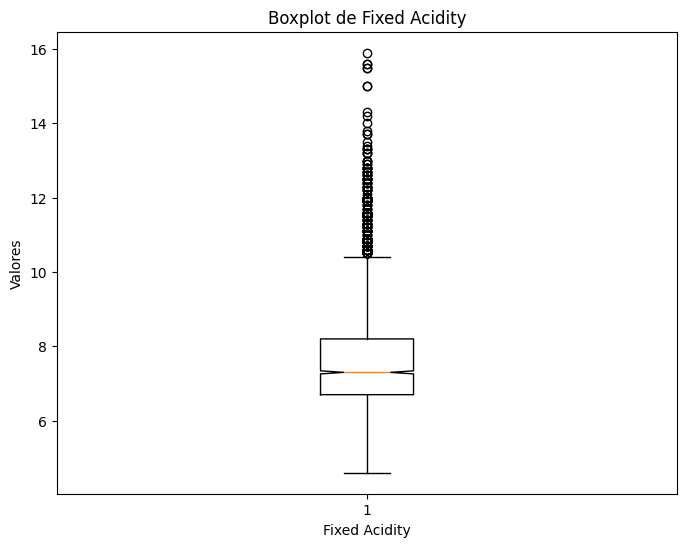

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['fixed acidity'], notch=True)
plt.title(f'Boxplot de Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

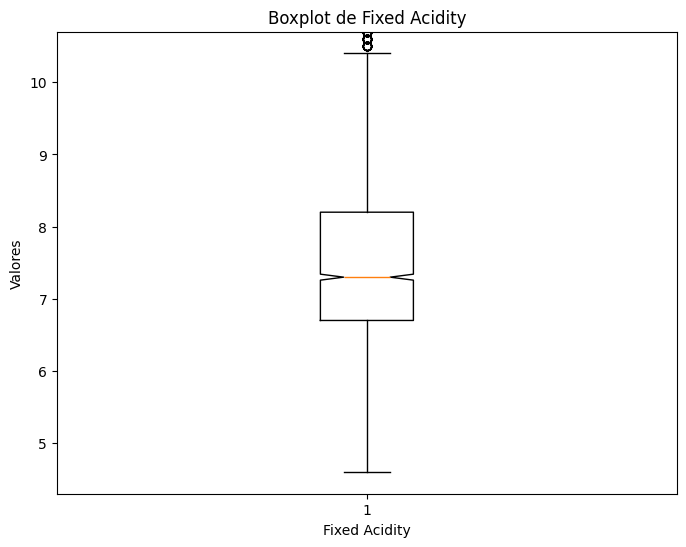

In [74]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['fixed acidity'], notch=True)
plt.title(f'Boxplot de Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Valores')
plt.ylim(4.3, 10.7)
plt.show()

##### VOLATILE ACIDITY

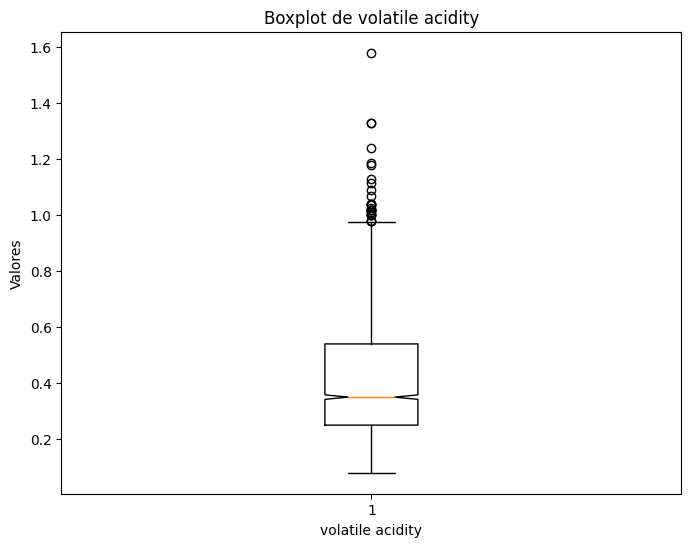

In [77]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['volatile acidity'], notch=True)
plt.title(f'Boxplot de volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

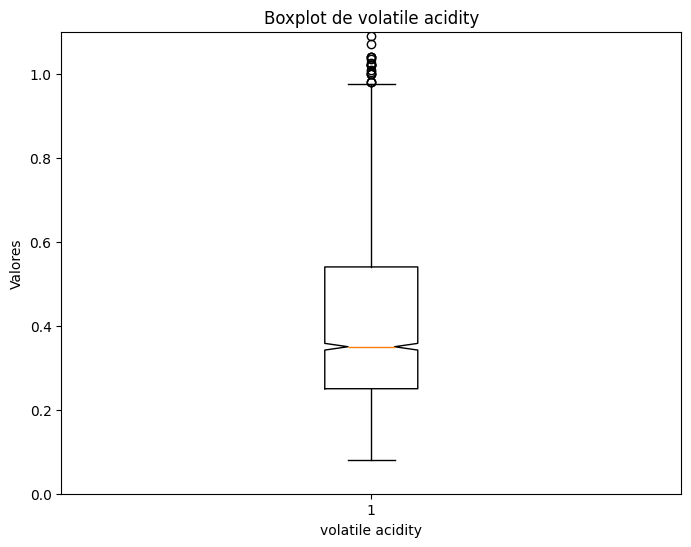

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['volatile acidity'], notch=True)
plt.title(f'Boxplot de volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Valores')
plt.ylim(0, 1.1)
plt.show()

##### CITRIC ACID

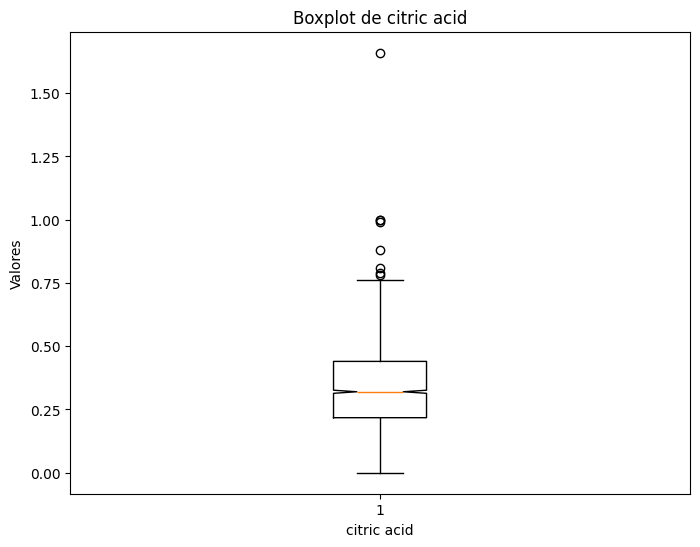

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['citric acid'], notch=True)
plt.title(f'Boxplot de citric acid')
plt.xlabel('citric acid')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

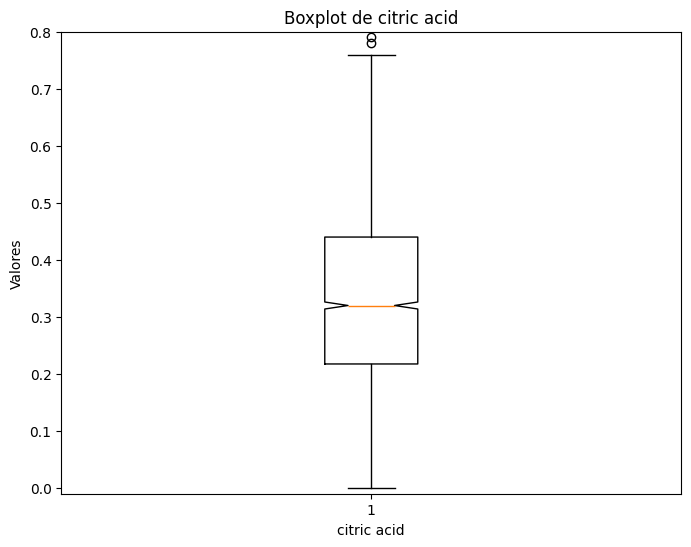

In [42]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['citric acid'], notch=True)
plt.title(f'Boxplot de citric acid')
plt.xlabel('citric acid')
plt.ylabel('Valores')
plt.ylim(-0.01, 0.8)
plt.show()

##### RESIDUAL SUGAR

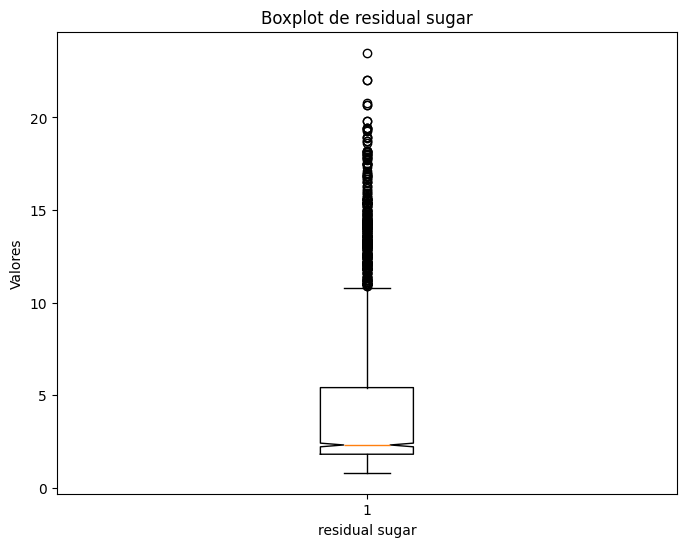

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['residual sugar'], notch=True)
plt.title(f'Boxplot de residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

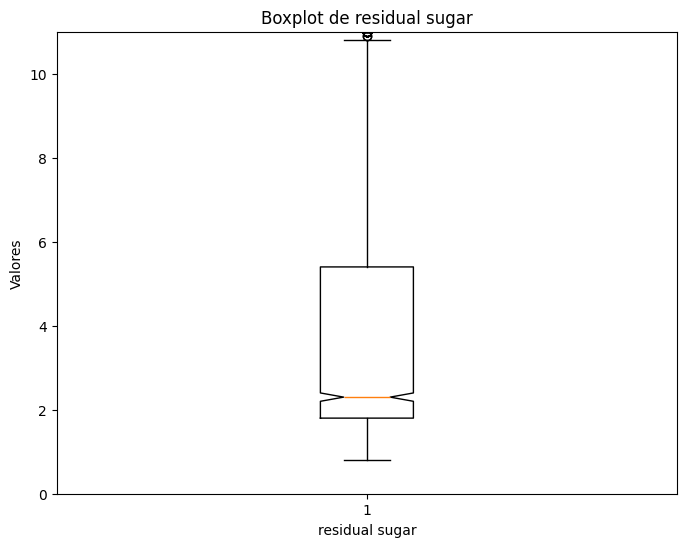

In [44]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['residual sugar'], notch=True)
plt.title(f'Boxplot de residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('Valores')
plt.ylim(0, 11)
plt.show()

##### CHLORIDES

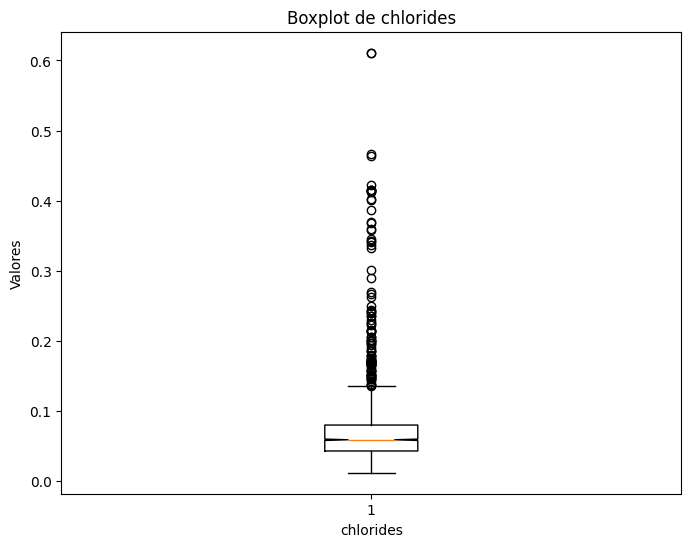

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['chlorides'], notch=True)
plt.title(f'Boxplot de chlorides')
plt.xlabel('chlorides')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

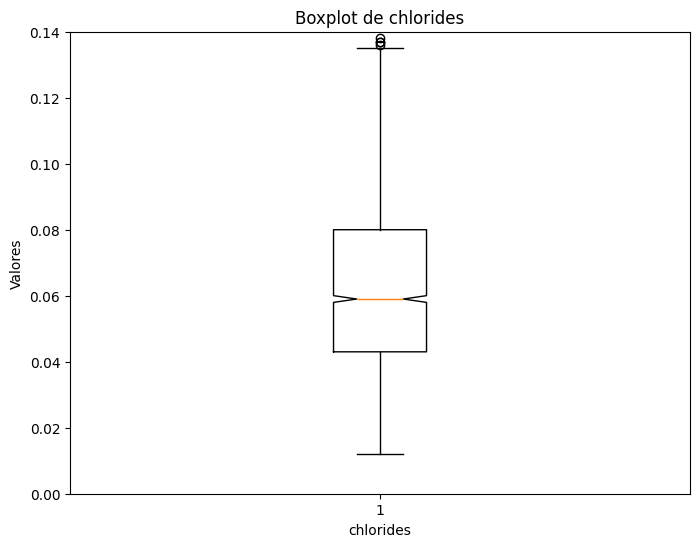

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['chlorides'], notch=True)
plt.title(f'Boxplot de chlorides')
plt.xlabel('chlorides')
plt.ylim(0, 0.14)
plt.ylabel('Valores')
plt.show()

##### FREE SULFUR DIOXIDE

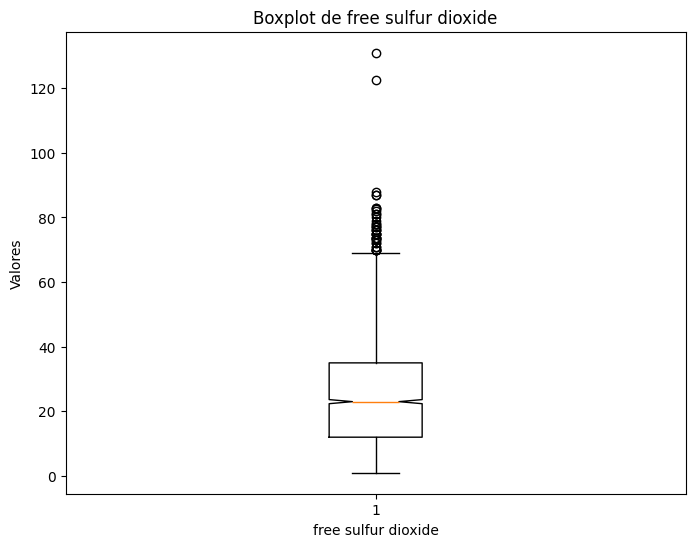

In [47]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['free sulfur dioxide'], notch=True)
plt.title(f'Boxplot de free sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

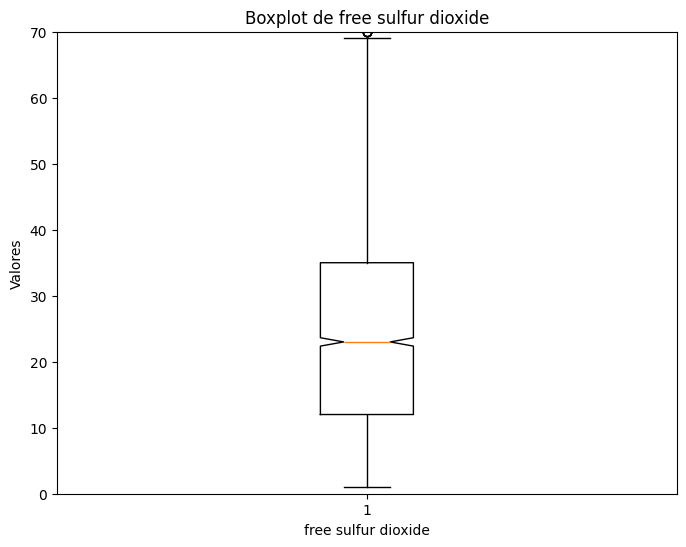

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['free sulfur dioxide'], notch=True)
plt.title(f'Boxplot de free sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Valores')
plt.ylim(0, 70)
plt.show()

##### TOTAL SULFUR DIOXIDE

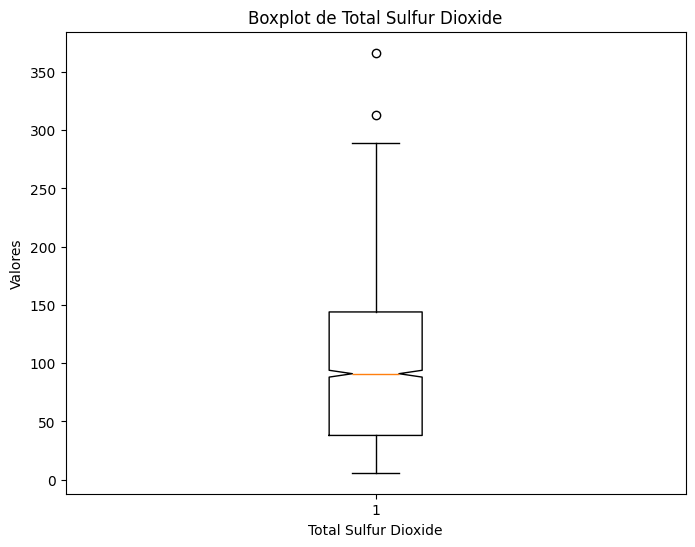

In [50]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds["total sulfur dioxide"], notch=True)
plt.title(f'Boxplot de Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

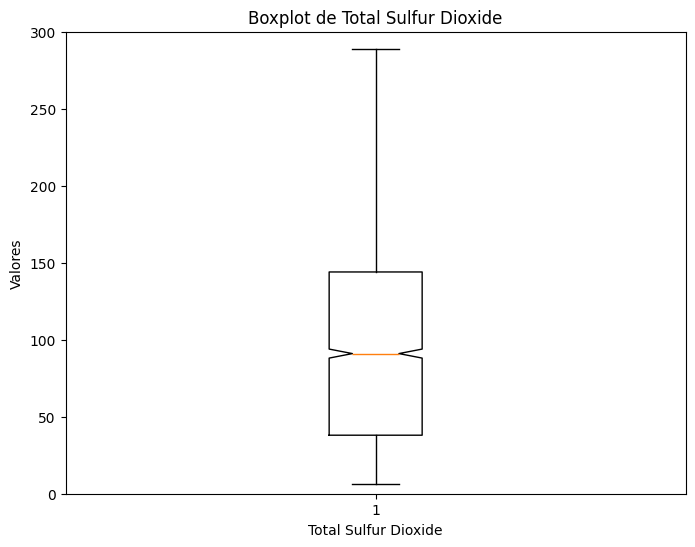

In [51]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds["total sulfur dioxide"], notch=True)
plt.title(f'Boxplot de Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Valores')
plt.ylim(0, 300)
plt.show()

##### DENSITY

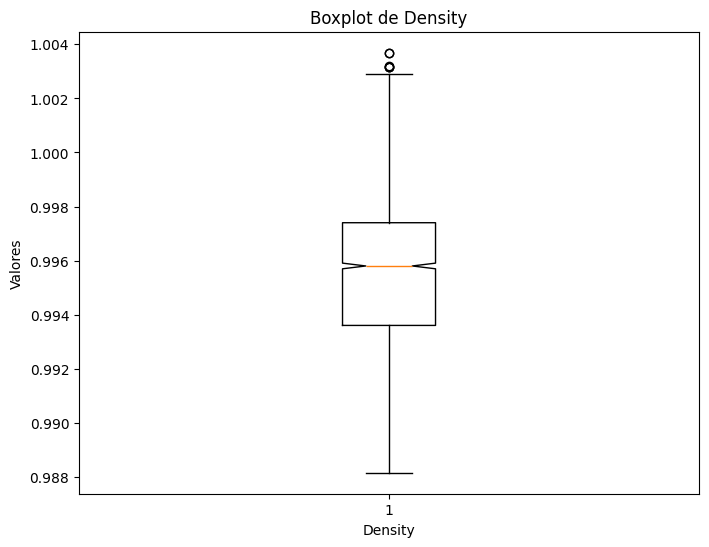

In [52]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds["density"], notch=True)
plt.title(f'Boxplot de Density')
plt.xlabel('Density')
plt.ylabel('Valores')
plt.show()

##### pH

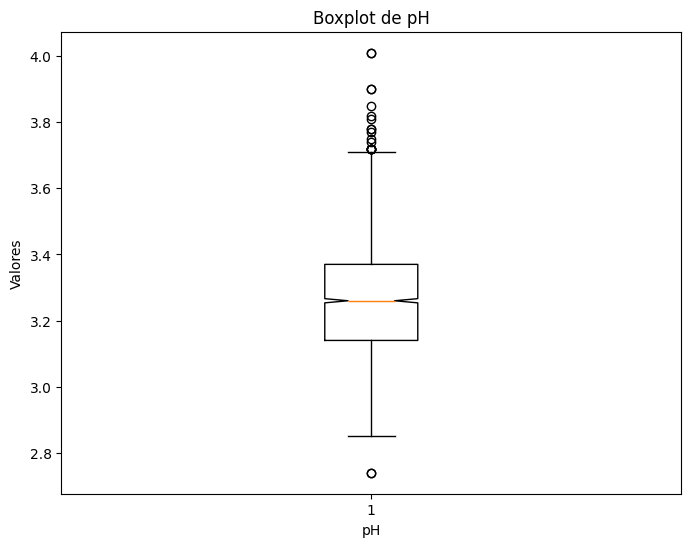

In [53]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['pH'], notch=True)
plt.title(f'Boxplot de pH')
plt.xlabel('pH')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

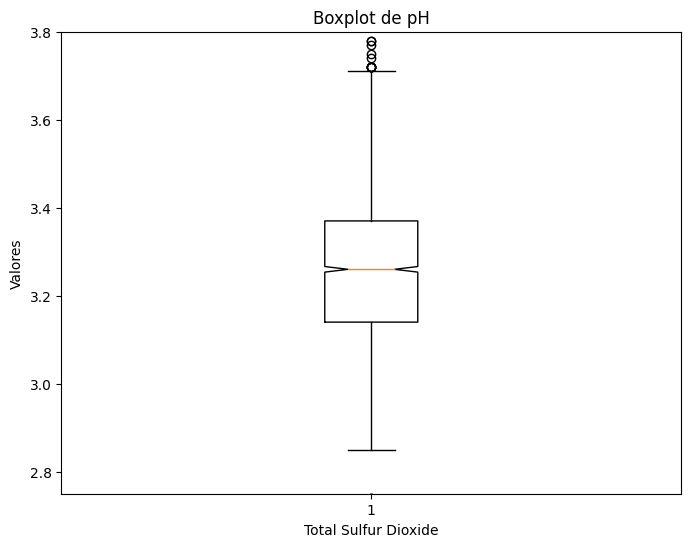

In [57]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds["pH"], notch=True)
plt.title(f'Boxplot de pH')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Valores')
plt.ylim(2.75, 3.8)
plt.show()

##### SULPHATES

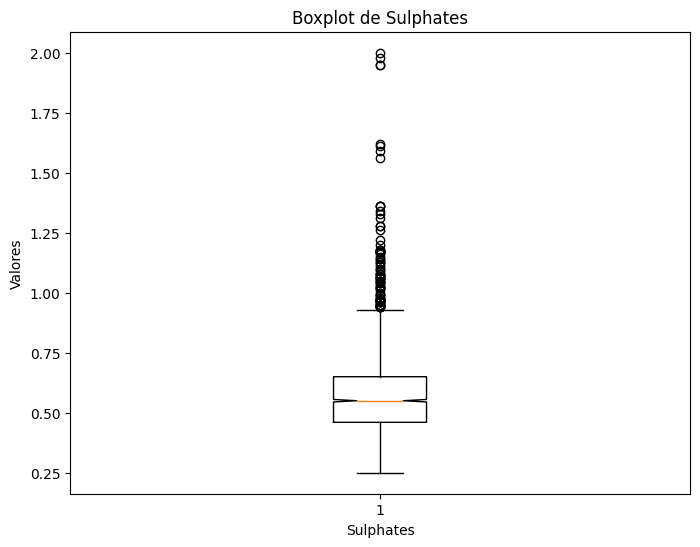

In [60]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['sulphates'], notch=True)
plt.title(f'Boxplot de Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

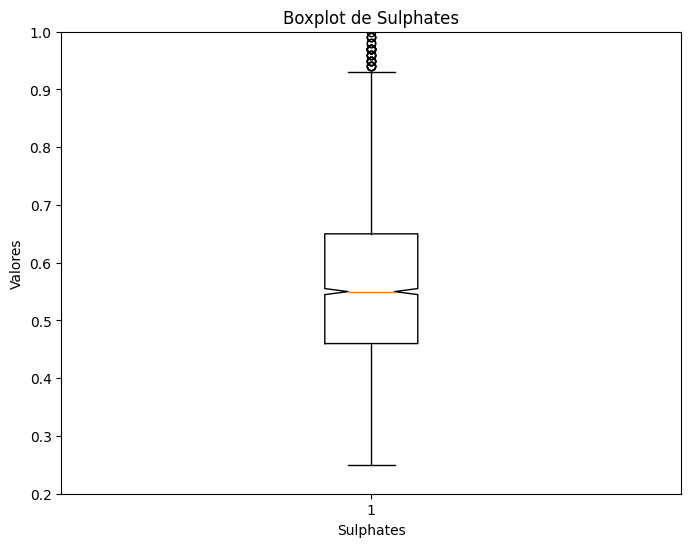

In [62]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['sulphates'], notch=True)
plt.title(f'Boxplot de Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Valores')
plt.ylim(0.2, 1)
plt.show()

##### ALCOHOL

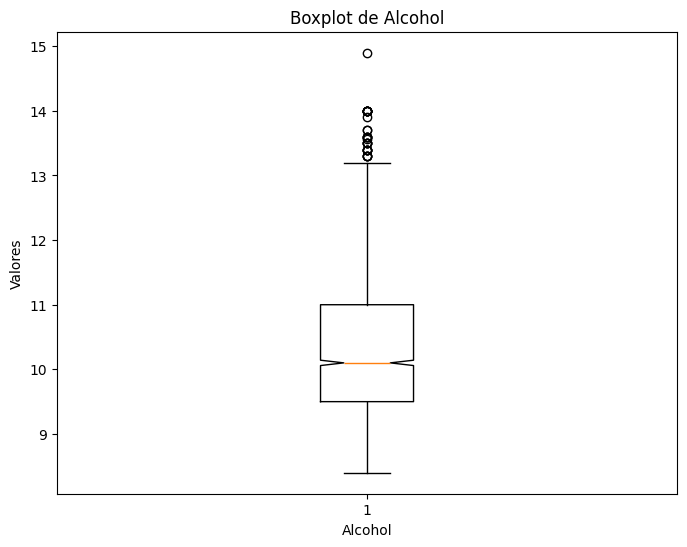

In [63]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['alcohol'], notch=True)
plt.title(f'Boxplot de Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Valores')
plt.show()

Mejoramos las escalas, para que se pueda ver la distribución...

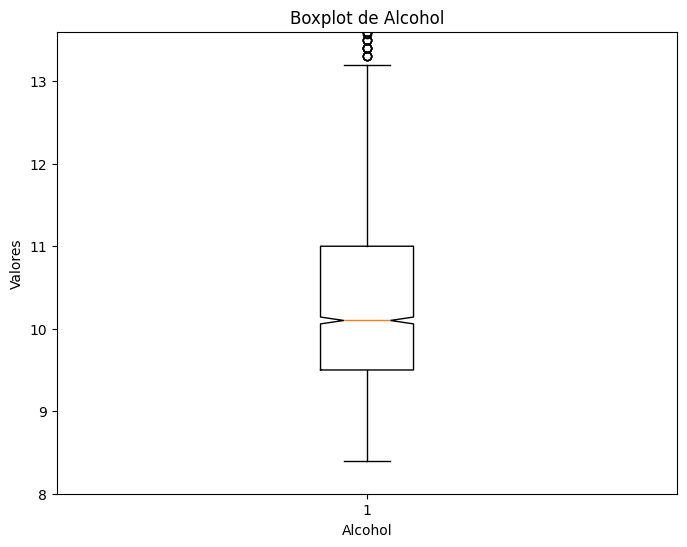

In [68]:
plt.figure(figsize=(8, 6))
plt.boxplot(preprocessed_ds['alcohol'], notch=True)
plt.title(f'Boxplot de Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Valores')
plt.ylim(8, 13.6)
plt.show()

##### TYPE

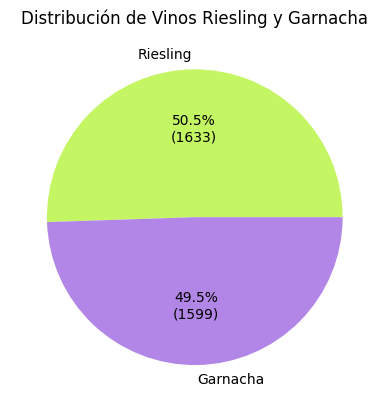

In [71]:
type_couts = preprocessed_ds['type_Riesling'].value_counts()

def autopct_func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f'{pct:.1f}%\n({absolute})'

plt.pie(type_couts, labels=['Riesling', 'Garnacha'], autopct=lambda pct: autopct_func(pct, type_couts), colors=['#c4f562', '#b286e6'])

plt.title('Distribución de Vinos Riesling y Garnacha')
plt.show()

##### QUALITY

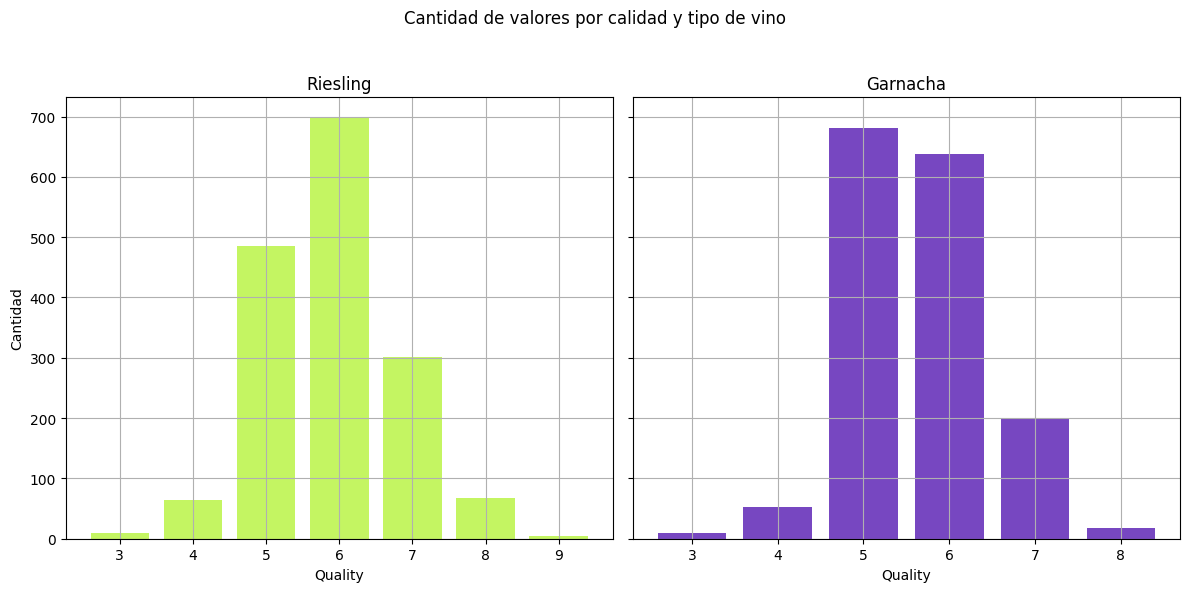

In [79]:
riesling_counts = preprocessed_ds[preprocessed_ds['type_Riesling'] == 1]['quality'].value_counts().sort_index()
garnacha_counts = preprocessed_ds[preprocessed_ds['type_Riesling'] == 0]['quality'].value_counts().sort_index()

# Creo la figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Barras de Riesling
axes[0].bar(riesling_counts.index, riesling_counts.values, color='#c4f562')
axes[0].set_title('Riesling')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Cantidad')
axes[0].grid(True)

# Barras de Garnacha
axes[1].bar(garnacha_counts.index, garnacha_counts.values, color='#7747c1')
axes[1].set_title('Garnacha')
axes[1].set_xlabel('Quality')
axes[1].grid(True)

plt.suptitle('Cantidad de valores por calidad y tipo de vino')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.close()

## Estudio bivariado

- correlaciones, heatmap, matriz umbralizada, matriz de s plots, scatter plots por separado, p-valores para el informe.
- Primeras conclusiones sobre correlaciones.

## Estudio multivariado

- correlaciones, heatmap, matriz umbralizada, matriz de s plots, scatter plots por separado, p-valores para el informe.
- Primeras conclusiones sobre correlaciones.

## Test de Hipótesis

- correlaciones, heatmap, matriz umbralizada, matriz de s plots, scatter plots por separado, p-valores para el informe.
- Primeras conclusiones sobre correlaciones.

# DUDAS & NOTAS

**NOTA:** CORREGIR TILDES Y NÚMEROS CON LETRAS O SIMBOLOS.  
**NOTA:** HAY NUMEROS EN DENSITY CON DISTINTAS PROFUNDIDADES.  

**AGREGAR:** FUENTES LPM.   
**AGREGAR:** ANALISIS DE PARA QUE SERVIRÍA CADA VARIABLE.  
**AGREGAR:** ANALIZAR EL RESTO DE ATRIBUTOS DE LA FILA "density" PARA SABER SI INFLUYEN EN LOS VALORES, O LOS PODEMOS BORRAR DEL DATASET.  
  
**DUDA:** EN ALGUNAS COLUMNAS HAY POCOS FLOAT. LOS DEJAMOS COMO ENTEROS?.  
**DUDA:** MUCHOS PROFILEREPORT.  
**DUDA:** LA METODOLOGIA ES CORRECTA?.  
**DUDA:** HACEMOS LAS HIPOTESIS Y LUEGO EN BASE A ELLAS EL ANÁLISIS UNIVARIADO/BIVARIADO/MULTIVARIADO?.  
**DUDA:** PODEMOS IR A LO QUE NOS COMPETE Y SALTEARNOS COSAS (EVITAR HACER BIVARIADO)?.  
**DUDA:** COMO PROBAMOS LO DE LOS PROMEDIOS?.  
**DUDA:** EL ANALISIS UNIVARIADO VA EN LA NOTEBOOK O EN EL INFORME?.  
**DUDA:** PODEMOS USAR GRAFICOS SOLO PARA PROBAR HIPOTESIS? ES REALMENTE NECESARIO HACER GRAFICOS DE LAS DISTRB EN EL UNIVARIADO?.  
**DUDA:** QUE TENEMOS QUE HACER PARA TENER UNA BUENA NOTA.  

**DUDAS RESPONDIDAS:** SE DEBE BORRAR LA COLUMNA TYPE ORIGINAL LUEGO DEL DUMMY ENCODING. _(respondida)_ si.  
**DUDAS RESPONDIDAS:** HACER ESCALADO ANTES DEL ANÁLISIS UNIVARIADO.  _(respondida)_ el escalado no se hace sin motivo.  
**DUDAS RESPONDIDAS:** ES NECESARIO COPIAR EL DATASET CUANDO CAMBIAMOS EL TIPO DEL DATO A FLOAT DE UNA FEATURE (Y CUANDO BORRAMOS COLUMNAS NULAS?)? _(respondida)_ si   
**DUDAS RESPONDIDAS:** MUCHOS OUTLIERS EN "DENSITY", VALORES SIN SENTIDO. ,99 < DENSITY < 1,015 _(respondida)_ nota agregar  
**DUDAS RESPONDIDAS:** SE PUEDE MEJORAR LA PRECISION DEL VALUE_COUNTS DE OTRA MANERA A LA NUESTRA (CORRECCION DE ALCOHOL)? _(respondida)_ si, usando gráficos.   
**DUDAS RESPONDIDAS:** ES NECESARIO QUE SEA TAN ATÓMICA LA NOTEBOOK? _(respondida)_ si .   
**DUDAS RESPONDIDAS:** TENEMOS QUÉ EXPLICAR DE DÓNDE SACAMOS EL TIPO DE DATO DE CADA VARIABLE? _(respondida)_ no.  
**DUDAS RESPONDIDAS:** DONDE PONEMOS LA BIBLIOGRAFIA. _(respondida)_ en el informe.    
**DUDAS RESPONDIDAS:** REVISAR LA EXPLICACION DE LO DEL ALCOHOL Y DENSITY. _(respondida)_ esta bien.     
**DUDAS RESPONDIDAS:** OUTLIER EN ACIDO CITRICO (PARECE SER RANDOM NO HAY RELACION CON EL RESTO DE ATRIBUTOS). _(respondida)_ no se hace nada  
**DUDAS RESPONDIDAS:** PREGUNTAR SOBRE SI EL 1.66 DE CITRIC ACID DEBERÍA CORREGIRSE PORQ ESTAMOS HABLANDO DE UN VALOR ILEGAL O NO COHERENTE CON LO QUE UNO ESPERA DEL VINO (ANALIZAR RESPECTO DE LOS OTROS ATRIBUTOS). _(respondida)_ no se sabe ni el año ni el lugar de la muestra, no aporta nada    
**DUDAS RESPONDIDAS:** ESTANDARIZAR O NORMALIZAR O ESTANDARIZACION ROBUSTA. _(respondida)_ la robusta no esta justificada porque si bien hay outliers no son mas de 2.    
**DUDAS RESPONDIDAS:** DUPLICADOS (NO AFECTAN LA DISTRIBUCION, NO APORTAN OUTLIERS EN ACIDO CITRICO PERO SI EN EL RESTO, BAJA PRECISION CON DATOS GENERA REPETIDOS). _(respondida)_ es una observacion, pero no alteran la distribucion de la muestra y podrían ser posible.   

#### ESCALADO

In [96]:
# reporte = ProfileReport(preprocessed_ds)
# reporte.to_notebook_iframe()

Como vemos en el reporte, el _pH_ es la única _feature_ que parece seguir una distribución parecida a la normal y que podría ser "estandarizable". El resto de distribuciones, no tienen suficientes outliers como para aplicar una estandarización robusta, por lo que normalizamos y no hacemos suposiciones.

In [97]:
"""
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

col_excluidas = ["pH", "type_Riesling", "chlorides"]

col_normalizar = list(preprocessed_ds.columns)

for col in col_excluidas :
    col_normalizar.remove(col)

preprocessed_ds[col_normalizar] = scaler.fit_transform(preprocessed_ds[col_normalizar])

preprocessed_ds.head()

"""

'\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Inicializar el MinMaxScaler\nscaler = MinMaxScaler()\n\ncol_excluidas = ["pH", "type_Riesling", "chlorides"]\n\ncol_normalizar = list(preprocessed_ds.columns)\n\nfor col in col_excluidas :\n    col_normalizar.remove(col)\n\npreprocessed_ds[col_normalizar] = scaler.fit_transform(preprocessed_ds[col_normalizar])\n\npreprocessed_ds.head()\n\n'